##Machine Translation Using a Seq2Seq Architecture

---
We will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207 

## Getting the data

In [ ]:
#Test Your Zaka
!git clone https://github.com/zaka-ai/machine_learning_certification

# change working directory
#
%cd machine_learning_certification/Challenge 7

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), done.
/content/machine_learning_certification/Challenge 7/machine_learning_certification/Challenge 7


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Test Your Zaka (English)
english=pd.read_csv('en.csv',names=['English'])
english.head()

,English
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
#Test Your Zaka (French)
french=pd.read_csv('fr.csv',names=['French'])
french.head()

,French
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [ ]:
#Test Your Zaka
eng_length=english.shape[0]
fr_length=french.shape[0]

print(f"English file contains {eng_length} sentence")
print(f"French file contains {fr_length} sentence")

English file contains 137860 sentence
French file contains 137860 sentence


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Zaka
df=pd.concat([english, french], axis=1)
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Zaka
print("Already assigned")

Already assigned


Pick a sentence and print it in both languages

In [ ]:
#Test Your Zaka
print(f"English sentence: {df.English[0]}")
print(f"French sentence: {df.French[0]}")

English sentence: new jersey is sometimes quiet during autumn , and it is snowy in april .
French sentence: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
#Test Your Zaka
df["English"] = df["English"].str.replace('[^\w\s]','')
df["French"] = df["French"].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
#Test Your Zaka
print(f"English sentence: {df.English[0]}")
print(f"French sentence: {df.French[0]}")


English sentence: new jersey is sometimes quiet during autumn  and it is snowy in april 
French sentence: new jersey est parfois calme pendant l automne  et il est neigeux en avril 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
ENG_Length_ar = [len(s.split()) for s in df.English]
FR_Length_ar = [len(s.split()) for s in df.French]

df['ENG_Length'] = ENG_Length_ar

In [ ]:
#Test Your Zaka
df['FR_Length'] = FR_Length_ar
df.head()


,English,French,ENG_Length,FR_Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

Text(0.5, 1.0, 'distribution of the lengths of english sentences')

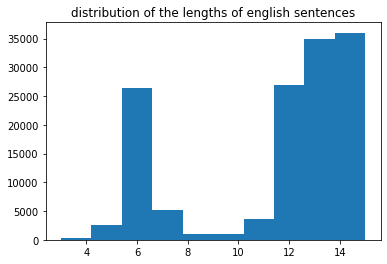

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt

plt.hist(df.ENG_Length)
plt.title("distribution of the lengths of english sentences")

Text(0.5, 1.0, 'distribution of the lengths of french sentences')

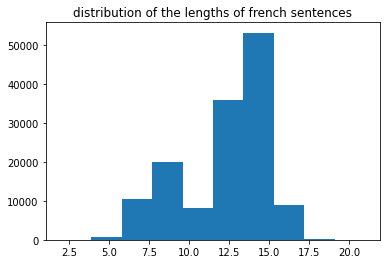

In [ ]:
#Test Your Zaka
plt.hist(df.FR_Length)
plt.title("distribution of the lengths of french sentences")

Get the maximum length of an english sentence and the maximum length of a french sentence. 

In [ ]:
#Test Your Zaka
print(f"The maximum nb of words in a french sentence is {df.FR_Length.max()}")
print(f"The maximum nb of words in a english sentence is {df.ENG_Length.max()}")


The maximum nb of words in a french sentence is 21
The maximum nb of words in a english sentence is 15


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded. 

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

False,  we need two tokenizers one for english and one for french, but we use the same library`

Tokenize the sentences that we have.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

#X=df['eng_sent'].values
#Y=df['fr_sent'].values

X=df['English'].values
Y=df['French'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"we have {x_train.shape} training examples and {x_test.shape} testing examples")

# define your tokenizer ()
en_tokenizer = Tokenizer(oov_token="<00V>") # in case there are words not seen in corpus
fr_tokenizer = Tokenizer( oov_token="<00V>") # in case there are words not seen in corpus


# assign an index (number) to each word using fit_on_texts function  
en_tokenizer.fit_on_texts(x_train)
en_word_index=en_tokenizer.word_index

fr_tokenizer.fit_on_texts(y_train)
fr_word_index=fr_tokenizer.word_index

# transform each text to a sequence of integers (to be used later in embeddings layer)
eng_seq =  en_tokenizer.texts_to_sequences(x_train)
fr_seq = fr_tokenizer.texts_to_sequences(y_train)

print(f"example of tranformed english sentence to sequence {eng_seq[0]}")
print(f"example of tranformed french sentence to sequence {fr_seq[0]}")

#test_en_seq= en_tokenizer.texts_to_sequences(x_test)

we have (110288,) training examples and (27572,) testing examples
example of tranformed english sentence to sequence [25, 2, 11, 62, 5, 35, 7, 4, 2, 66, 3, 43]
example of tranformed french sentence to sequence [8, 33, 2, 13, 20, 27, 98, 6, 4, 2, 67, 3, 48]


**How many unique words do we have in english and in french?**

In [ ]:
print(f"We have {len(en_word_index)-1} English words, words index {en_word_index}")
print(f"We have {len(fr_word_index)-1} French words, words index {fr_word_index}")


We have 199 English words, words index {'<00V>': 1, 'is': 2, 'in': 3, 'it': 4, 'during': 5, 'the': 6, 'but': 7, 'and': 8, 'sometimes': 9, 'never': 10, 'usually': 11, 'favorite': 12, 'least': 13, 'fruit': 14, 'most': 15, 'liked': 16, 'loved': 17, 'new': 18, 'paris': 19, 'united': 20, 'states': 21, 'india': 22, 'jersey': 23, 'california': 24, 'france': 25, 'china': 26, 'she': 27, 'he': 28, 'grapefruit': 29, 'your': 30, 'her': 31, 'his': 32, 'my': 33, 'spring': 34, 'fall': 35, 'june': 36, 'winter': 37, 'autumn': 38, 'march': 39, 'january': 40, 'november': 41, 'nice': 42, 'february': 43, 'september': 44, 'summer': 45, 'july': 46, 'snowy': 47, 'december': 48, 'beautiful': 49, 'october': 50, 'our': 51, 'may': 52, 'pleasant': 53, 'april': 54, 'cold': 55, 'wonderful': 56, 'their': 57, 'freezing': 58, 'dry': 59, 'warm': 60, 'busy': 61, 'chilly': 62, 'mild': 63, 'august': 64, 'rainy': 65, 'quiet': 66, 'hot': 67, 'wet': 68, 'relaxing': 69, 'likes': 70, 'dislikes': 71, 'grapes': 72, 'lemons': 73, 

####Padding

**What should be the length of the sequences that we have after padding?**

length of the sequences should be equal to the length of the longest  french sentence

Perform padding on the sequences that we have.

In [ ]:
#Test Your Zaka
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_seq_length=max(len(x) for x in fr_seq )
print(f"Max sequence length {max_seq_length}")

train_en_sent = pad_sequences(eng_seq, maxlen=max_seq_length, padding='post')
train_fr_sent = pad_sequences(fr_seq, maxlen=max_seq_length, padding='post')

# Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
#Expanding dimensions
train_fr_sent= train_fr_sent.reshape(*train_fr_sent.shape, 1)
print(train_en_sent.shape,train_fr_sent.shape)

# define vocabulary size
eng_vocab_size = len(en_word_index) + 1
fr_vocab_size = len(fr_word_index) + 1

Max sequence length 21
(110288, 21) (110288, 21, 1)


In [ ]:
print(x_train[0], train_en_sent[0])
print(y_train[0], train_fr_sent[0])
print(eng_vocab_size, fr_vocab_size)

#200 343 104097 98631

france is usually chilly during fall  but it is quiet in february  [25  2 11 62  5 35  7  4  2 66  3 43  0  0  0  0  0  0  0  0  0]
la france est généralement froid à lautomne  mais il est calme en février  [[ 8]
 [33]
 [ 2]
 [13]
 [20]
 [27]
 [98]
 [ 6]
 [ 4]
 [ 2]
 [67]
 [ 3]
 [48]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]
201 344


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

Notes:

TimeDistributed wrapper layer: allows us to apply a layer to every temporal slice of an input-->  That means that instead of having several input “models”, we can use “one model” applied to each input. 

TimeDistributedDense applies a same Dense (fully-connected) operation to every timestep of a 3D tensor.

There are two key points to remember when using the TimeDistributed wrapper layer:

The input must be (at least) 3D. This often means that you will need to configure your last LSTM layer prior to your TimeDistributed wrapped Dense layer to return sequences (e.g. set the “return_sequences” argument to “True”).

The output will be 3D. This means that if your TimeDistributed wrapped Dense layer is your output layer and you are predicting a sequence, you will need to resize your y array into a 3D vector.

Notes:

The RepeatVector layer acts as a bridge between the encoder and decoder modules.
It prepares the 2D array input for the first LSTM layer in Decoder.

In [ ]:
#Test Your Zaka
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.losses import sparse_categorical_crossentropy

print(f" train_en_sent shape { train_en_sent.shape},train_Y shape { train_fr_sent.shape}")
print(f" eng_vocab_size {eng_vocab_size} ,fr_vocab_size {fr_vocab_size}")

embedding_dim = 300

model = Sequential()

model.add(Embedding(eng_vocab_size, embedding_dim, input_length=max_seq_length, input_shape=train_en_sent.shape[1:]))
model.add(LSTM(256, return_sequences=True)) #return_sequences=True to convert shape to 3D to fit TimeDistributed   
model.add(TimeDistributed(Dense(1024, activation='relu')))
model.add(TimeDistributed(Dense(fr_vocab_size, activation='softmax'))) 

# Compile model
model.compile(loss=sparse_categorical_crossentropy,#Used as a loss function for multi-class classification model where the output label is assigned integer value
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

 train_en_sent shape (110288, 21),train_Y shape (110288, 21, 1)
 eng_vocab_size 201 ,fr_vocab_size 344
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 21, 300)           60300     
                                                                 
 lstm_3 (LSTM)               (None, 21, 256)           570368    
                                                                 
 time_distributed_4 (TimeDis  (None, 21, 1024)         263168    
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 21, 344)          352600    
 tributed)                                                       
                                                                 
Total params: 1,246,436
Trainable params: 1,246,436
Non-trainable params: 0
_______

Compile and train the model. 
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
#Test Your Zaka
history=model.fit(train_en_sent, train_fr_sent, batch_size=500, epochs=30, validation_split=0.2)

Epoch 1/30
177/177 [==============================] - 8s 34ms/step - loss: 2.1751 - accuracy: 0.5360 - val_loss: 1.1775 - val_accuracy: 0.6923
Epoch 2/30
177/177 [==============================] - 6s 31ms/step - loss: 0.8333 - accuracy: 0.7698 - val_loss: 0.6259 - val_accuracy: 0.8090
Epoch 3/30
177/177 [==============================] - 6s 32ms/step - loss: 0.5289 - accuracy: 0.8345 - val_loss: 0.4649 - val_accuracy: 0.8523
Epoch 4/30
177/177 [==============================] - 6s 32ms/step - loss: 0.4210 - accuracy: 0.8636 - val_loss: 0.4176 - val_accuracy: 0.8633
Epoch 5/30
177/177 [==============================] - 6s 32ms/step - loss: 0.3646 - accuracy: 0.8799 - val_loss: 0.3663 - val_accuracy: 0.8784
Epoch 6/30
177/177 [==============================] - 6s 32ms/step - loss: 0.3311 - accuracy: 0.8896 - val_loss: 0.3192 - val_accuracy: 0.8923
Epoch 7/30
177/177 [==============================] - 6s 32ms/step - loss: 0.3052 - accuracy: 0.8973 - val_loss: 0.3007 - val_accuracy: 0.8988

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
def translate(text,en_tokenizer,fr_tokenizer,max_seq_length, model):
  text=re.sub(r'[^\w\s]', '', text)

  sentence = [en_tokenizer.word_index[word] for word in text.split()]
  sentence = pad_sequences([sentence], maxlen=max_seq_length, padding='post')

  result=model.predict(sentence[:1])[0]
  index_to_words = {id: word for word, id in fr_tokenizer.word_index.items()}
  index_to_words[0] = '<PAD>'
  result=' '.join([index_to_words[prediction] for prediction in np.argmax(result, 1)])

  result=result.split()

  output=[]
  for i in result:
    if i !='<PAD>':
      output.append(i)

  return (' '.join(output))


Test the following sentence

In [ ]:
input = "she is driving the truck"
#Test Your Zaka

result=translate(input,en_tokenizer,fr_tokenizer,max_seq_length, model)
print(result)

elle conduit le voiture bleu


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
# Build the layers    
model2 = Sequential()
# Embedding
model2.add(Embedding(eng_vocab_size, 256, input_length=train_en_sent.shape[1],
                      input_shape=train_en_sent.shape[1:]))
# Encoder
model2.add(Bidirectional(LSTM(128)))
model2.add(RepeatVector(max_seq_length))
# Decoder
model2.add(Bidirectional(LSTM(128, return_sequences=True)))
model2.add(TimeDistributed(Dense(1024, activation='relu')))
model2.add(TimeDistributed(Dense(fr_vocab_size, activation='softmax')))
model2.compile(loss=sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 21, 256)           51456     
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 repeat_vector_1 (RepeatVect  (None, 21, 256)          0         
 or)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 21, 256)          394240    
 nal)                                                            
                                                                 
 time_distributed_6 (TimeDis  (None, 21, 1024)         263168    
 tributed)                                            

compile and train your new model.

In [ ]:
#Test Your Zaka
# Compile model
model2.compile(loss=sparse_categorical_crossentropy,
                optimizer='adam',
                metrics=['accuracy'])
# fit
history2=model2.fit(train_en_sent, train_fr_sent, batch_size=500, epochs=30, validation_split=0.2)

Epoch 1/30
177/177 [==============================] - 15s 56ms/step - loss: 2.1702 - accuracy: 0.5241 - val_loss: 1.4281 - val_accuracy: 0.6109
Epoch 2/30
177/177 [==============================] - 8s 43ms/step - loss: 1.2530 - accuracy: 0.6554 - val_loss: 1.1186 - val_accuracy: 0.6915
Epoch 3/30
177/177 [==============================] - 8s 45ms/step - loss: 1.0123 - accuracy: 0.7152 - val_loss: 0.9101 - val_accuracy: 0.7403
Epoch 4/30
177/177 [==============================] - 7s 42ms/step - loss: 0.8474 - accuracy: 0.7526 - val_loss: 0.7649 - val_accuracy: 0.7760
Epoch 5/30
177/177 [==============================] - 8s 43ms/step - loss: 0.7026 - accuracy: 0.7895 - val_loss: 0.6300 - val_accuracy: 0.8093
Epoch 6/30
177/177 [==============================] - 8s 43ms/step - loss: 0.5687 - accuracy: 0.8278 - val_loss: 0.5237 - val_accuracy: 0.8416
Epoch 7/30
177/177 [==============================] - 8s 43ms/step - loss: 0.4567 - accuracy: 0.8624 - val_loss: 0.4171 - val_accuracy: 0.874

Define a new function that relies on your new model to make predictions.

In [ ]:
#Test Your Zaka
# same function as above
model2.save('/content/machine_learning_certification/Challenge 7/En_Fr_Translation.h5')

In [ ]:
#Test Your Zaka

input = "she is driving the truck"

print(translate(input,en_tokenizer,fr_tokenizer,max_seq_length, model2))

print("Other Examples \n")
count=0
for i in x_test:
  print("Original\n", i)
  print("Translated")
  print(translate(i,en_tokenizer,fr_tokenizer,max_seq_length, model2))
  print("\n")
  count+=1
  if count>15:
    break

elle conduit le camion noir
Other Examples
Original 
 china is usually busy during september  but it is sometimes cold in spring 
Translated
chine est généralement occupé en septembre mais il est parfois froid au printemps
 

Original 
 he dislikes pears and peaches 
Translated
il naime les les poires et les pêches
 

Original 
 the united states is sometimes rainy during january  but it is mild in may 
Translated
les étatsunis est parfois pluvieux en janvier mais il est doux en mai
 

Original 
 california is mild during march  but it is sometimes rainy in october 
Translated
california est doux au mois de mars mais il est parfois pluvieux en octobre
 

Original 
 he dislikes mangoes and strawberries 
Translated
il aime pas les mangues et les
 

Original 
 the grapefruit is her favorite fruit  but the lemon is your favorite 
Translated
le pamplemousse est son fruit préféré mais le citron est votre favori
 

Original 
 i think translating between english and portuguese is easy 
Transla

**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

Adding attention layer would improve model's performance.The attention layer allows the decoder to focus on the parts of the sequence needed for getting the output correct at that time step therefore shortening the path between the input word to its translation, thereby alleviating some of the memory limitations that LSTMs can have. It does this by providing a way of scoring tokens in the target sequence against all the tokens on the source sequence and using this to change the input to the decoder sequence. The scores are then fed into a softmax activation to make a attention distribution.

**What are some additional ways that we can do to improve the performance of our model?**

We can do hyperparamater tuning (nb of layers, nb of neurons, optimizer, learning rate etc.) to choose the optimal paramters that would leverage the performance of our model. 

In [ ]:
###Demo
# First, install Gradio
!pip install --quiet gradio
import gradio as gr

In [ ]:
import tensorflow as tf
import re

def En_Fr_Translator(text):
    text=re.sub(r'[^\w\s]', '', text)
    tr_model = tf.keras.models.load_model('/content/machine_learning_certification/Challenge 7/En_Fr_Translation.h5')
    sentence = [en_tokenizer.word_index[word] for word in text.split()]
    sentence = pad_sequences([sentence], maxlen=max_seq_length, padding='post')

    result=tr_model.predict(sentence[:1])[0]
    index_to_words = {id: word for word, id in fr_tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'
    result=' '.join([index_to_words[prediction] for prediction in np.argmax(result, 1)])
    output=[]
    for i in result:
      if i != '<PAD>':
        output.append(i)

    output=' '.join(output)
    return output

translator_gui=gr.Interface(fn=En_Fr_Translator, inputs="text", outputs='text',title="En_Fr_Translation")

translator_gui.launch(share=True);



Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://37022.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
